# Assignment
------------------------------------------------------------------------------------------------------------------------------------
You will anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

1. Use Pandas to import the data from epa-sea-level.csv.

In [31]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [32]:
df = pd.read_csv('epa-sea-level.csv')

In [33]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [34]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


2. Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

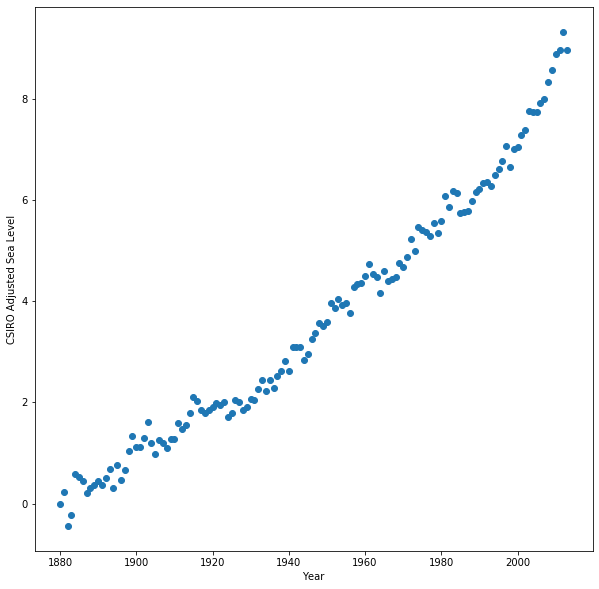

In [35]:
# Create scatter plot
fig, ax = plt.subplots(figsize = (10,10))
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.scatter(x=df['Year'],y=df['CSIRO Adjusted Sea Level'])

In [36]:

x = df['Year']
y = df['CSIRO Adjusted Sea Level']

# Get Values of LinearReg
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
print("slope: %f | intercept: %f | R-squared: %f"  %(slope, intercept,r_value**2))

slope: 0.063045 | intercept: -119.065942 | R-squared: 0.969747


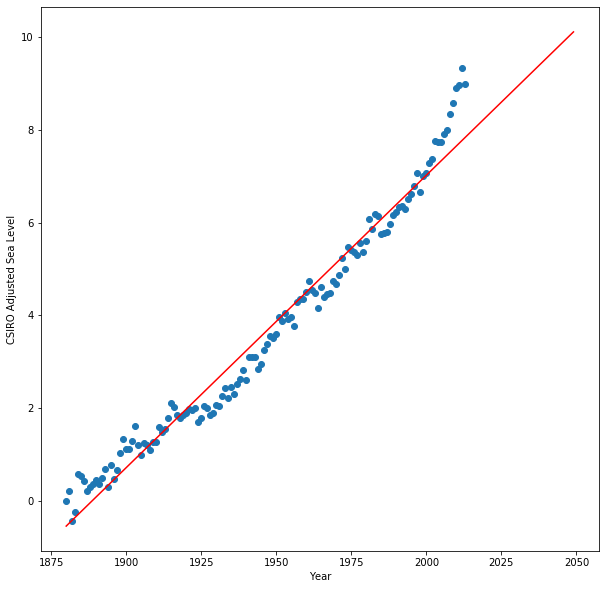

In [37]:
# Create first line of best fit
x1 = np.arange(1880,2050)
y1 = intercept + slope * x1
fig, ax = plt.subplots(figsize = (10,10))
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.scatter(x=df['Year'],y=df['CSIRO Adjusted Sea Level'])
plt.plot(x1,y1, 'r' , label = 'Best Fit line 1')


3. Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
4. The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".
Unit tests are written for you under test_module.py.

Text(0.5, 1.0, 'Rise in Sea Level')

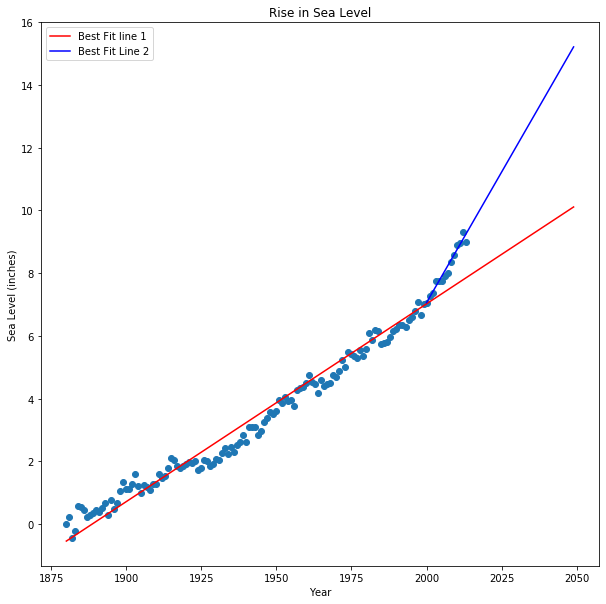

In [39]:
# Create second line of best fit
x2 = df.Year[df['Year']>=2000]
y2 = df[df['Year']>=2000]['CSIRO Adjusted Sea Level']

slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, y2)

x2 = list(range(2000,2050))
y2 = [] 

for i in x2:
    y2.append(intercept2 + slope2 * i)

fig, ax = plt.subplots(figsize = (10,10))
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.scatter(x=df['Year'],y=df['CSIRO Adjusted Sea Level'])
plt.plot(x1,y1, 'r' , label = 'Best Fit line 1')
plt.plot(x2,y2, 'b', label = 'Best Fit Line 2')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')